Project: Machine Learning 1 - Midterm

Author:Prince Birring & Ryan Orsini

#### Model

In [2]:
#Import numpy / pandas
import numpy as np 
import pandas as pd
import datetime 
import glob

#plot import 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

# machine learning
import os
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from subprocess import check_output

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

#Print all rows and columns. Dont hide any
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#print(check_output(["ls", '/Users/rhinomonkey/Desktop/Project1_Machine Learning/CSV_files']).decode('utf8'))
#data file 'accident.csv' to dataframe
os.chdir('C:\\Users\\princ\\Downloads\\Test')
df_ac = pd.read_csv('accident.csv')
df_ac.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,TWAY_ID,TWAY_ID2,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,0,1,1,2015,5,2,40,0,1,3,1,3,SR-5,NaN,1754,33.878653,-87.325328,0,35,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,0,1,1,2015,5,22,13,1,1,1,1,1,I-65,NaN,3604,34.910442,-86.908708,0,34,0,0,1,1,0,3,2,10,0,10,0,0000000,99,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,0,1,1,2015,5,1,25,0,1,3,1,2,US-SR 6,NaN,1958,32.142006,-85.758456,0,42,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,0,4,1,2015,1,0,57,0,1,4,1,3,SR-27,NaN,566,31.439814,-85.510300,0,53,0,0,1,1,0,4,2,10,0,10,0,0000000,99,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,2050,7,1,2015,4,7,9,0,2,3,1,2,US-SR 53,HINTON WATERS AVE,308,31.319331,-85.515100,0,12,6,0,2,3,0,1,1,1,0,1,0,0000000,99,99,7,16,88,88,0,0,0,1,0


In [4]:
#data file 'person.csv' to dataframe
df_per = pd.read_csv('person.csv')
df_per.head()

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,MINUTE,RUR_URB,FUNC_SYS,HARM_EV,MAN_COLL,SCH_BUS,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,TOW_VEH,SPEC_USE,EMER_USE,ROLLOVER,IMPACT1,FIRE_EXP,AGE,SEX,PER_TYP,INJ_SEV,SEAT_POS,REST_USE,REST_MIS,AIR_BAG,EJECTION,EJ_PATH,EXTRICAT,DRINKING,ALC_DET,ALC_STATUS,ATST_TYP,ALC_RES,DRUGS,DRUG_DET,DSTATUS,DRUGTST1,DRUGTST2,DRUGTST3,DRUGRES1,DRUGRES2,DRUGRES3,HOSPITAL,DOA,DEATH_DA,DEATH_MO,DEATH_YR,DEATH_HR,DEATH_MN,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,127,1,1,2,40,1,3,35,0,0,12.0,12481.0,31.0,2003.0,0.0,0.0,0.0,0.0,12.0,0.0,68,1,1,4,11,7,0,1,0,0,0,9,9,2,1,189,9,8,2,1,0,0,1,0,0,0,7,1,1,2015,2,40,240,0,0,0,0,0,0,7,1,0
1,1,10002,1,1,1,0,83,1,1,22,13,1,1,34,0,0,49.0,49040.0,4.0,2006.0,0.0,0.0,0.0,1.0,6.0,0.0,49,1,1,4,11,7,0,20,1,9,0,0,9,2,1,0,0,8,2,1,1,1,358,996,996,0,7,1,1,2015,22,13,2213,0,0,0,0,0,0,7,1,0
2,1,10003,1,1,1,0,11,1,1,1,25,1,3,42,0,0,20.0,20037.0,4.0,2008.0,0.0,0.0,0.0,1.0,12.0,1.0,31,1,1,4,11,7,0,1,0,0,0,1,9,2,1,188,9,8,2,1,0,0,1,0,0,0,7,1,1,2015,1,25,125,0,0,0,0,0,0,7,2,0
3,1,10003,1,1,2,0,11,1,1,1,25,1,3,42,0,0,20.0,20037.0,4.0,2008.0,0.0,0.0,0.0,1.0,12.0,1.0,20,2,2,2,13,7,0,1,0,0,0,8,9,0,0,996,8,8,0,0,0,0,0,0,0,5,0,88,88,8888,88,88,8888,999,99,0,0,0,8,0,0,0
4,1,10004,1,1,1,0,45,4,1,0,57,1,4,53,0,0,12.0,12481.0,31.0,2005.0,0.0,0.0,0.0,0.0,12.0,0.0,40,1,1,4,11,7,0,20,0,0,0,1,9,2,1,260,9,8,2,1,0,0,1,0,0,0,7,4,1,2015,0,57,57,0,0,0,0,0,0,7,1,0


In [5]:
#We can see that the two files share STATE & STATE case so we merge them into one 
#Each accident has a number of people - when merged the rows for certain state cases expand dependent upon victim no.
df_com = pd.merge (df_ac, df_per)

In [6]:
#Move in cleaned data sheet to do more analysis for model
df_cc = pd.read_excel('combclean.xlsx')
df_cc.head(10)

,STATE,CITY,DAY,MONTH,DAY_WEEK,HOUR,MINUTE,NHS,ROUTE,HARM_EV,MAN_COLL,LGT_COND,WEATHER1,WEATHER2,WEATHER,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,DRUNK_DR,MAKE,BODY_TYP,MOD_YEAR,ROLLOVER,IMPACT1,FIRE_EXP,AGE,SEX,PER_TYP,SEAT_POS,REST_USE,REST_MIS,AIR_BAG,EJECTION,DRINKING,DRUGS,RACE,DIED
0,1,0,1,1,5,2,40,0,3,35,0,2,1,0,1,2,58,88,88,1,12.0,31.0,2003.0,0.0,12.0,0.0,68,1,1,11,7,0,1,0,9,9,1,1.0
1,1,0,1,1,5,22,13,1,1,34,0,2,10,0,10,22,20,88,88,0,49.0,4.0,2006.0,1.0,6.0,0.0,49,1,1,11,7,0,20,1,0,0,1,1.0
2,1,0,1,1,5,1,25,0,2,42,0,2,1,0,1,1,45,99,99,1,20.0,4.0,2008.0,1.0,12.0,1.0,31,1,1,11,7,0,1,0,1,9,2,1.0
3,1,0,1,1,5,1,25,0,2,42,0,2,1,0,1,1,45,99,99,1,20.0,4.0,2008.0,1.0,12.0,1.0,20,2,2,13,7,0,1,0,8,8,0,0.0
4,1,0,4,1,1,0,57,0,3,53,0,2,10,0,10,1,15,88,88,1,12.0,31.0,2005.0,0.0,12.0,0.0,40,1,1,11,7,0,20,0,1,9,1,1.0
5,1,2050,7,1,4,7,9,0,2,12,6,1,1,0,1,7,16,88,88,0,69.0,3.0,2006.0,1.0,3.0,0.0,24,1,1,11,3,0,20,0,0,0,1,1.0
6,1,2050,7,1,4,7,9,0,2,12,6,1,1,0,1,7,16,88,88,0,85.0,63.0,2015.0,0.0,12.0,0.0,60,1,1,11,3,0,0,0,0,0,0,0.0
7,1,0,8,1,5,9,59,0,4,1,0,1,1,0,1,10,17,99,99,0,12.0,30.0,2006.0,1.0,0.0,0.0,64,1,1,11,7,0,20,1,0,0,1,1.0
8,1,0,8,1,5,9,59,0,4,1,0,1,1,0,1,10,17,99,99,0,12.0,30.0,2006.0,1.0,0.0,0.0,17,1,2,13,3,0,20,0,8,8,0,0.0
9,1,1730,8,1,5,18,33,1,2,43,0,3,1,0,1,18,38,99,99,0,23.0,30.0,2002.0,0.0,12.0,0.0,80,1,1,11,3,0,20,0,8,8,1,1.0


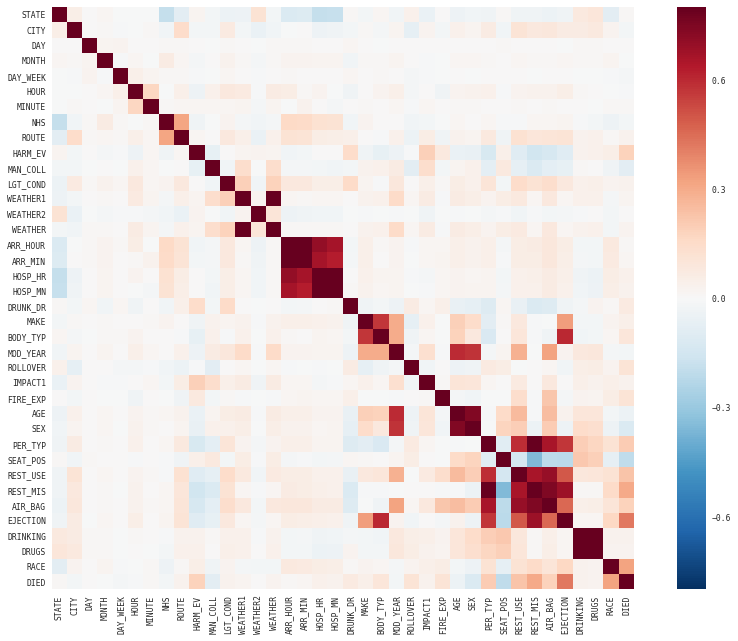

In [7]:
#Heat Map to see the corelationshi between different variables
import seaborn as sns
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
corrmat = df_cc.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
f.tight_layout()

In [8]:
#Random forest to select the important features from the dataset using classifier function
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

df_feat = df_cc.drop('DIED', axis=1)
X = df_feat
X=X.replace(np.nan, -999)
Y = df_cc['DIED']
Y=Y.replace(np.nan, -999)
names = ['STATE','CITY','DAY','MONTH','DAY_WEEK','HOUR','MINUTE','NHS','ROUTE','HARM_EV','MAN_COLL','LGT_COND','WEATHER1','WEATHER2','WEATHER','ARR_HOUR','ARR_MIN','HOSP_HR','HOSP_MN','DRUNK_DR','MAKE','BODY_TYP','MOD_YEAR','ROLLOVER','IMPACT1','FIRE_EXP','AGE','SEX','PER_TYP','SEAT_POS','REST_USE','REST_MIS','AIR_BAG','EJECTION','EXTRICAT','DRINKING','DRUGS','RACE']

x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1)

rf = RandomForestClassifier()
rfClf = rf.fit(x_train,y_train)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names),
            reverse=True))

Features sorted by their score:
[(0.76019999999999999, 'DRUGS'), (0.060199999999999997, 'EJECTION'), (0.019800000000000002, 'IMPACT1'), (0.0152, 'REST_USE'), (0.0138, 'BODY_TYP'), (0.0134, 'MOD_YEAR'), (0.0118, 'HARM_EV'), (0.010999999999999999, 'ROLLOVER'), (0.0106, 'AGE'), (0.010200000000000001, 'EXTRICAT'), (0.0088000000000000005, 'REST_MIS'), (0.0067999999999999996, 'SEAT_POS'), (0.0054000000000000003, 'SEX'), (0.0047000000000000002, 'PER_TYP'), (0.0041000000000000003, 'MAKE'), (0.0038999999999999998, 'STATE'), (0.0033999999999999998, 'MINUTE'), (0.0033999999999999998, 'DRINKING'), (0.0030000000000000001, 'HOSP_MN'), (0.0030000000000000001, 'DAY'), (0.0028, 'CITY'), (0.0025999999999999999, 'MONTH'), (0.0023999999999999998, 'MAN_COLL'), (0.0023999999999999998, 'HOUR'), (0.0023, 'ARR_MIN'), (0.0022000000000000001, 'HOSP_HR'), (0.0020999999999999999, 'AIR_BAG'), (0.0016999999999999999, 'ROUTE'), (0.0016999999999999999, 'ARR_HOUR'), (0.0016000000000000001, 'DAY_WEEK'), (0.0012999999999

In [9]:
#Accuracy of the Random forest
score = rfClf.score(x_test, y_test)
print(score)

0.991859830248


In [32]:
#Creating a new dataframe of the selected variables from the random forest
df_cc['DIED'] = df_cc['DIED'].apply(lambda x: 0 if (x==0)  else 1)# 0-Not Died & 1-Died
df_ml = pd.DataFrame()
df_ml['DRUGS'] = X['DRUGS'].fillna(0)## 0 No DRUGS & 1- Yes DRUGS
df_ml['EJECTION'] = X['EJECTION'].fillna(0)## 0-Front & 1-Back
df_ml['REST_USE'] = X['REST_USE'].fillna(0)## 0-Use Belt & 1-Doesn't Use Belt
df_ml['AIR_BAG'] = X['AIR_BAG'].fillna(0)## 0-Not Deployed & 1-Deployed
df_ml['SEAT_POS'] = X['SEAT_POS'].fillna(0)## 0-Front & 1-Back
df_ml['SEX'] = X['SEX'].fillna(0)##0-Male & 1-Female

In [33]:
#Converting the variables of the dataframe in 0 and 1
df_ml['DRUGS'] = df_ml['DRUGS'].apply(lambda x: 0 if (x==0)  else 1)
x = pd.get_dummies(df_ml['DRUGS'], prefix = 'DRUGS')
df_ml['EJECTION'] = df_ml['EJECTION'].apply(lambda x: 0 if (x==1&2&3)  else 1)
x = pd.concat([x, pd.get_dummies(df_ml['EJECTION'], prefix ='EJECTION')], axis=1)
df_ml['REST_USE'] = df_ml['REST_USE'].apply(lambda x: 0 if (x==1&2&3) else 1)
x = pd.concat([x, pd.get_dummies(df_ml['REST_USE'], prefix = 'REST_USE')], axis=1)
df_ml['AIR_BAG'] = df_ml['AIR_BAG'].apply(lambda x: 1 if (x==1&2&3&7&8&9) else 0)
x = pd.concat([x, pd.get_dummies(df_ml['AIR_BAG'], prefix = 'AIR_BAG')], axis=1)
df_ml['SEAT_POS'] = df_ml['SEAT_POS'].apply(lambda x: 0 if (x<=20) else 1)
x = pd.concat([x, pd.get_dummies(df_ml['SEAT_POS'], prefix = 'SEAT_POS')], axis=1)
df_ml['SEX'] = df_ml['SEX'].apply(lambda x: 0 if (x==1) else 1)
x = pd.concat([x, pd.get_dummies(df_ml['SEX'], prefix ='SEX')], axis=1)

In [34]:
#Preprocessing the library and data for the logistic regression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(df_cc['DIED'])
X = scaler.fit_transform(x)

In [35]:
#Creating a training and testing dataset from the original dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1)

In [36]:
#Base rate mode - which predict that everyone maximum fatal
def base_rate_model(x):
    y = np.zeros(x.shape[0])
    return y

In [37]:
#How the accurate is my base rate model?
y_base_rate = base_rate_model(x_test)
from sklearn.metrics import accuracy_score
print('Base rate accuracy is %2.2f'% accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.55


In [38]:
# import the linear regression model from the sklearn and name it as model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [39]:
#Implementing the logistic regression model
model.fit(x_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
#Cheaking the accuracy for the Logistic Regression model
print('Logistic accuracy is %2.2f'% accuracy_score(y_test, model.predict(x_test)))

Logistic accuracy is 0.73


In [41]:
## c score to compare the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [42]:
print('----Base Model-----')
#Base rate Auc
base_roc_auc = roc_auc_score(y_test, base_rate_model(x_test))
print('Base Rate AUC = %2.2f'%base_roc_auc)
print(classification_report(y_test, base_rate_model(x_test)))
print('\n\n-----Logistic Model-----')
#Logistic AUC
logist_roc_auc = roc_auc_score(y_test, model.predict(x_test))
print('logistic AUC = %2.2f'%logist_roc_auc)
print(classification_report(y_test,model.predict(x_test)))

----Base Model-----
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.55      1.00      0.71     11058
          1       0.00      0.00      0.00      9089

avg / total       0.30      0.55      0.39     20147



-----Logistic Model-----
logistic AUC = 0.71
             precision    recall  f1-score   support

          0       0.68      0.93      0.79     11058
          1       0.86      0.48      0.61      9089

avg / total       0.76      0.73      0.71     20147



In [43]:
#Preprocessig data for the roc curve adn importing the package for the roc_curve from the sklearn
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

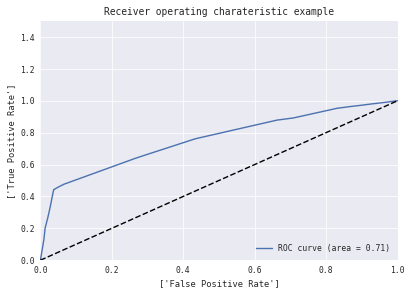

In [44]:
#plot of a ROC Curve for a specific for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logist_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.5])
plt.xlabel(['False Positive Rate'])
plt.ylabel(['True Positive Rate'])
plt.title('Receiver operating charateristic example')
plt.legend(loc ='lower right')
plt.show()

1. ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
2. You can't actually see the thresholds used to generate the curve on the ROC curve itself



In [45]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [46]:
evaluate_threshold(0.5)

Sensitivity: 0.476069974695
Specificity: 0.934617471514


In [47]:
evaluate_threshold(0.3)

Sensitivity: 0.878534492243
Specificity: 0.337583649846


AUC is the percentage of the ROC plot that is underneath the Curve

In [48]:
#Important: first argument is true values, second argument is predicted probabilities
y_pred_prob = model.predict_proba(x_test)[:,1]
print(metrics.roc_auc_score(y_test,y_pred_prob ))

0.757456547789


1. AUC is useful as a single number summary of classifier performance.
2. If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
3. AUC is useful even when there is high class imbalance (unlike classification accuracy).



In [49]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, Y, cv=10, scoring='roc_auc').mean()

0.75837412941749427

#### ROC/AUC advantages:
1. Does not require you to set a classification threshold
2. Still useful when there is high class imbalance

#### Confusion matrix advantages:
1. Allows you to calculate a variety of metrics
2. Useful for multi-class problems (more than two response classes)

#### Confusion Matrix
Table that describes the performnce of a classification model

In [50]:
##Confusion Matrix
print(metrics.confusion_matrix(y_test,  model.predict(x_test)))

[[10335   723]
 [ 4762  4327]]


1. Every observation in the testing set is represented in exactly one box
2. It's a 2x2 matrix because there are 2 response classes
3. The format shown here is not universal

Basic Terminology:
1. True Positives (TP): we correctly predicted that they do have diabetes
2. True Negatives (TN): we correctly predicted that they don't have diabetes
3. False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
4. False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")

In [51]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, model.predict(x_test))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

### Metrics computed from a confusion matrix
Classification Accuracy: Overall, how often is the classifier correct?

In [52]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, model.predict(x_test)))

0.72775102993
0.72775102993


Classification Error: Overall, how often is the classifier incorrect?
Also known as "Misclassification Rate"

In [53]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, model.predict(x_test)))

0.27224897007
0.27224897007


Specificity: When the actual value is negative, how often is the prediction correct?
How "specific" (or "selective") is the classifier in predicting positive instances?



In [54]:
print(TN / float(TN + FP))

0.934617471514


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?


In [55]:
print(FP / float(TN + FP))

0.0653825284862


Precision: When a positive value is predicted, how often is the prediction correct?
How "precise" is the classifier when predicting positive instances?

In [56]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, model.predict(x_test)))

0.856831683168
0.856831683168


Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.

Conclusion:

1. Confusion matrix gives you a more complete picture of how your classifier is performing
2. Also allows you to compute various classification metrics, and these metrics can guide your model selection
